In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image, display

In [3]:
%matplotlib inline

In [5]:
df = pd.read_csv("data/ufos/scrubbed.csv")

# Summary operators

Compute the mean of all columns with a numeric data type.

In [7]:
df.mean(numeric_only=True)

duration (seconds)    9016.889016
latitude                38.124416
longitude              -86.772885
dtype: float64

Compute the mean ufo sighting duration.

In [9]:
df["duration (seconds)"].mean()

9016.889016344669

Compute the median ufo sighting duration.

In [10]:
df["duration (seconds)"].median()

180.0

Compute the standard deviation of the ufo sighting duration.

In [11]:
df["duration (seconds)"].std()

620216.790291459

Compute the minimum and maximum of the duration.

In [12]:
minDuration = df["duration (seconds)"].min()
maxDuration = df["duration (seconds)"].max()

Display the row with the maximum duration.

In [19]:
df[df["duration (seconds)"] == maxDuration]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
559,1983-10-01 17:00:00,birmingham (uk/england),NaN,gb,sphere,97836000.0,31 years,Firstly&#44 I was stunned and stared at the ob...,4/12/2013,52.466667,-1.916667


# Data manipulation

Create a new column with the sighting durations in minutes (instead of seconds).

In [21]:
df["duration (minutes)"] = df["duration (seconds)"] / 60

Display both of these columns.

In [23]:
df[["duration (seconds)", "duration (minutes)"]]

,duration (seconds),duration (minutes)
0,2700.0,45.000000
1,7200.0,120.000000
2,20.0,0.333333
3,20.0,0.333333
4,900.0,15.000000
...,...,...
80327,600.0,10.000000
80328,1200.0,20.000000
80329,1200.0,20.000000
80330,5.0,0.083333


# Counting

Check how many sighting were reported for each country.

In [24]:
df.country.value_counts()

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

Check the proportion of sightings per country.

In [25]:
df.country.value_counts(normalize=True)

us    0.921485
ca    0.042456
gb    0.026959
au    0.007614
de    0.001486
Name: country, dtype: float64

Display the sightings for each combination of country and state.

In [30]:
pd.set_option("display.max_rows", 500)

In [33]:
df[["country", "state"]].value_counts()#(sort=False)

country  state
us       ca       8912
         wa       3966
         fl       3835
         tx       3447
         ny       2980
         il       2499
         az       2414
         pa       2366
         oh       2275
         mi       1836
         or       1747
         nc       1740
         mo       1458
         co       1413
ca       on       1354
us       in       1288
         va       1273
         ma       1256
         nj       1255
         ga       1255
         wi       1232
         tn       1119
         mn       1012
         sc       1003
         ct        892
         ky        855
         md        837
         nv        803
         ok        724
         nm        720
ca       bc        691
us       ia        678
         al        642
         ut        622
         ks        613
         ar        588
         me        558
         la        558
         id        521
         nh        486
         mt        478
         wv        448
         ne        

# Aggregating data

Display the mean sighting duration per country (Tip: use the `groupby` method).

In [40]:
df.groupby("country")["duration (seconds)"].mean()

country
au     3806.469238
us     5800.014047
de    24255.980952
ca    28859.437007
gb    66061.321207
Name: duration (seconds), dtype: float64

Display the mean durations in a sorted order.

In [42]:
df.groupby("country")["duration (seconds)"].mean().sort_values()

country
ca    120.0
au    180.0
de    180.0
gb    180.0
us    180.0
Name: duration (seconds), dtype: float64

Display the mean durations in a sorted order.

In [44]:
df.groupby("country")["duration (seconds)"].mean().sort_values()

country
au     3806.469238
us     5800.014047
de    24255.980952
ca    28859.437007
gb    66061.321207
Name: duration (seconds), dtype: float64

Do the same but with median instead of mean.

In [45]:
df.groupby("country")["duration (seconds)"].median().sort_values()

country
ca    120.0
au    180.0
de    180.0
gb    180.0
us    180.0
Name: duration (seconds), dtype: float64

# Visualizing

In [50]:
#Make the graphs a bit prettier
plt.style.use('ggplot')

## Barplots

Make a barplot showing the number of sightings per country (either using pandas' plotting methods or seaborn).

<AxesSubplot:>

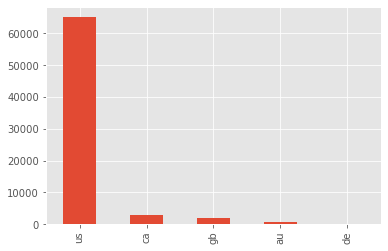

In [51]:
df["country"].value_counts().plot.bar()

<AxesSubplot:xlabel='country', ylabel='count'>

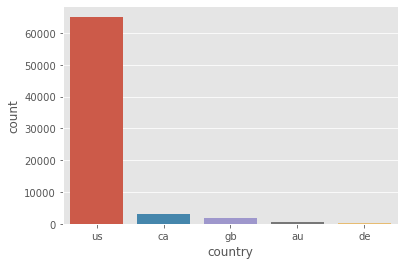

In [53]:
order = df["country"].value_counts().index
sns.countplot(data=df, x='country', order=order)

Make a barplot showing the mean sighting duration per country.

<AxesSubplot:xlabel='country'>

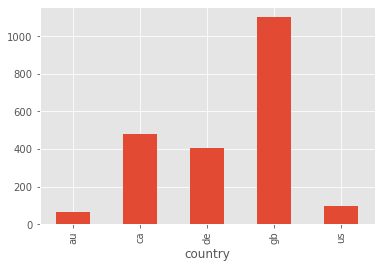

In [61]:
df.groupby("country")["duration (minutes)"].mean().plot.bar() # .sort_values().plot.bar()

<AxesSubplot:xlabel='country', ylabel='duration (minutes)'>

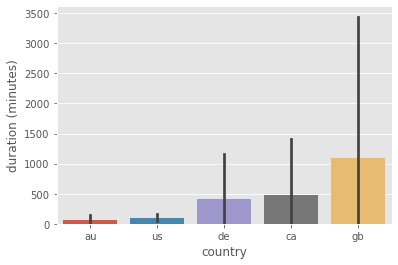

In [63]:
order = df.groupby("country")["duration (minutes)"].mean().sort_values().index
sns.barplot(data=df, x="country", y="duration (minutes)", order=order)

## Histograms

Show the distribution of sighting durations (as a histogram).

<AxesSubplot:ylabel='Frequency'>

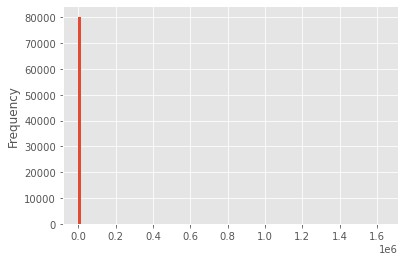

In [67]:
df["duration (minutes)"].plot.hist() # bins=100

<AxesSubplot:ylabel='Frequency'>

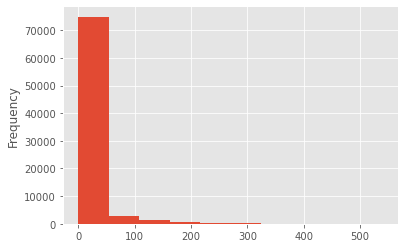

In [72]:
df[df["duration (minutes)"] < 600]["duration (minutes)"].plot.hist() # bins=100

<AxesSubplot:xlabel='duration (minutes)', ylabel='Count'>

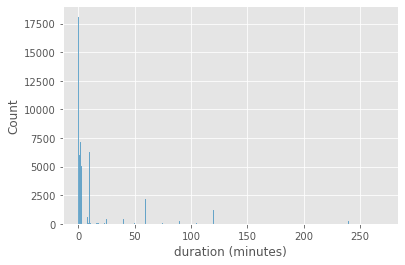

In [78]:
sns.histplot(data=df[df["duration (minutes)"] < 300], x="duration (minutes)")

## Boxplots

<AxesSubplot:title={'center':'duration (minutes)'}, xlabel='country'>

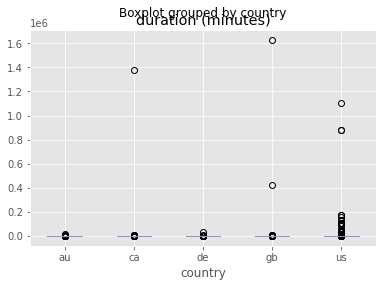

In [81]:
df.boxplot(column=["duration (minutes)"], by="country")

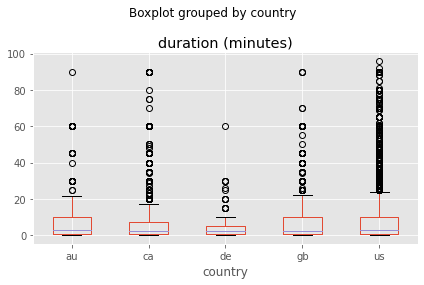

In [84]:
df[df["duration (minutes)"] < 100].boxplot(column=["duration (minutes)"], by="country")
plt.tight_layout()

<AxesSubplot:xlabel='country', ylabel='duration (minutes)'>

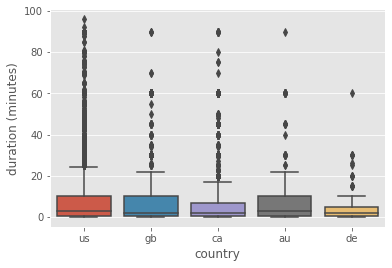

In [83]:
sns.boxplot(data=df[df["duration (minutes)"] < 100], x="country", y="duration (minutes)")

# Well done!

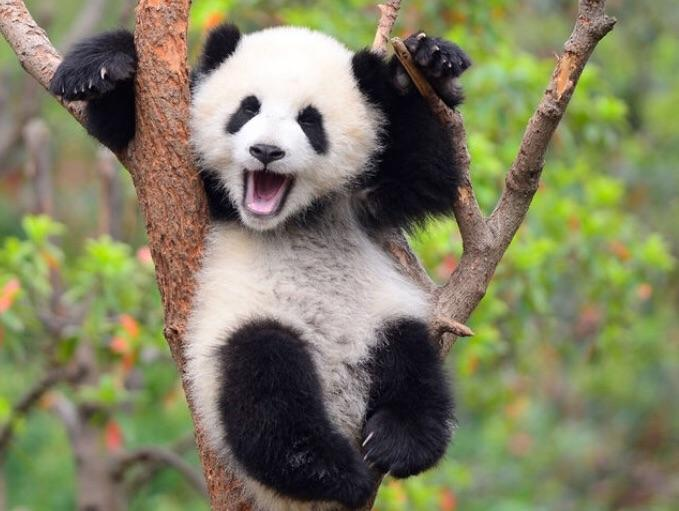

In [87]:
display(Image(filename='data/images/cute_panda_celebration.jpg'))